In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

import wrangle as w

In [2]:
# plotting defaults
plt.rc('figure', figsize=(20, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
df = w.get_health_data('Record')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2269523 entries, 0 to 2269522
Data columns (total 11 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   @type                             object
 1   @sourceName                       object
 2   @sourceVersion                    object
 3   @unit                             object
 4   @creationDate                     object
 5   @startDate                        object
 6   @endDate                          object
 7   @value                            object
 8   MetadataEntry                     object
 9   @device                           object
 10  HeartRateVariabilityMetadataList  object
dtypes: object(11)
memory usage: 190.5+ MB


In [5]:
clean_df = w.clean_records_list(df)

In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267590 entries, 0 to 2269522
Data columns (total 9 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   activity_type        object
 1   source               object
 2   source_ver           object
 3   unit_of_measure      object
 4   creation_time        object
 5   activity_start_time  object
 6   activity_end_time    object
 7   value                object
 8   device               object
dtypes: object(9)
memory usage: 173.0+ MB


In [7]:
records_list = w.records_list_time_zone_fun(clean_df)

In [8]:
records_list

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time,total_time
date,,,,,,,,,,
2007-03-06,BodyMass,健康,15.5,kg,121.4,NaN,0,16:25,16:25,0 days 00:00:00
2007-03-06,Height,健康,15.5,cm,191.0,NaN,0,16:26,16:26,0 days 00:00:00
2015-10-10,DistanceWalkingRunning,Marky Doug,9.0.2,km,0.00144,"<<HKDevice: 0x2833bde00>, name:iPhone, manufac...",1,18:48,18:54,0 days 00:06:00
2015-10-10,DistanceWalkingRunning,Marky Doug,9.0.2,km,0.25881,"<<HKDevice: 0x2833bde00>, name:iPhone, manufac...",1,18:21,18:26,0 days 00:05:00
2015-10-10,DistanceWalkingRunning,Marky Doug,9.0.2,km,0.00276,"<<HKDevice: 0x2833bde00>, name:iPhone, manufac...",1,18:15,18:21,0 days 00:06:00
...,...,...,...,...,...,...,...,...,...,...
2022-12-08,HeartRate,Mark的Apple Watch,9.1,count/min,98.0,"<<HKDevice: 0x2833a97c0>, name:Apple Watch, ma...",0,07:28,07:28,0 days 00:00:00
2022-12-08,DistanceWalkingRunning,Mark的Apple Watch,9.1,km,0.004358,"<<HKDevice: 0x2833fc050>, name:Apple Watch, ma...",0,07:28,07:28,0 days 00:00:03
2022-12-08,BasalEnergyBurned,Mark的Apple Watch,9.1,Cal,0.083,"<<HKDevice: 0x2833b8e10>, name:Apple Watch, ma...",0,07:28,07:28,0 days 00:00:03


In [9]:
records_list.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2267590 entries, 2007-03-06 to 2022-12-08
Data columns (total 10 columns):
 #   Column           Dtype          
---  ------           -----          
 0   activity_type    object         
 1   source           object         
 2   source_ver       object         
 3   unit_of_measure  object         
 4   value            object         
 5   device           object         
 6   in_china         uint8          
 7   start_time       object         
 8   end_time         object         
 9   total_time       timedelta64[ns]
dtypes: object(8), timedelta64[ns](1), uint8(1)
memory usage: 175.2+ MB


In [10]:
records_list.activity_type.value_counts()

StepCount                         650299
ActiveEnergyBurned                529598
DistanceWalkingRunning            302735
BasalEnergyBurned                 270744
HeartRate                         237855
WalkingSpeed                       38954
WalkingStepLength                  38951
AppleExerciseTime                  37130
WalkingDoubleSupportPercentage     31306
AppleStandTime                     28282
WalkingAsymmetryPercentage         18394
FlightsClimbed                     15171
EnvironmentalAudioExposure         14127
HeadphoneAudioExposure             11075
AppleStandHour                      7273
RespiratoryRate                     5656
SleepAnalysis                       5070
OxygenSaturation                    3239
HeartRateVariabilitySDNN            2587
StairDescentSpeed                   2235
StairAscentSpeed                    1654
DietaryEnergyConsumed               1341
DietaryCarbohydrates                1283
DietaryFatTotal                     1256
DietarySugar    

In [11]:
step_counts = records_list[records_list['activity_type'] == 'StepCount']

In [12]:
step_counts.unit_of_measure.value_counts()

count    650299
Name: unit_of_measure, dtype: int64

In [13]:
step_counts.value = step_counts.value.astype(int)

In [14]:
daily_steps = step_counts['2020/08'].resample('D')[['value']].sum()

<AxesSubplot:xlabel='date'>

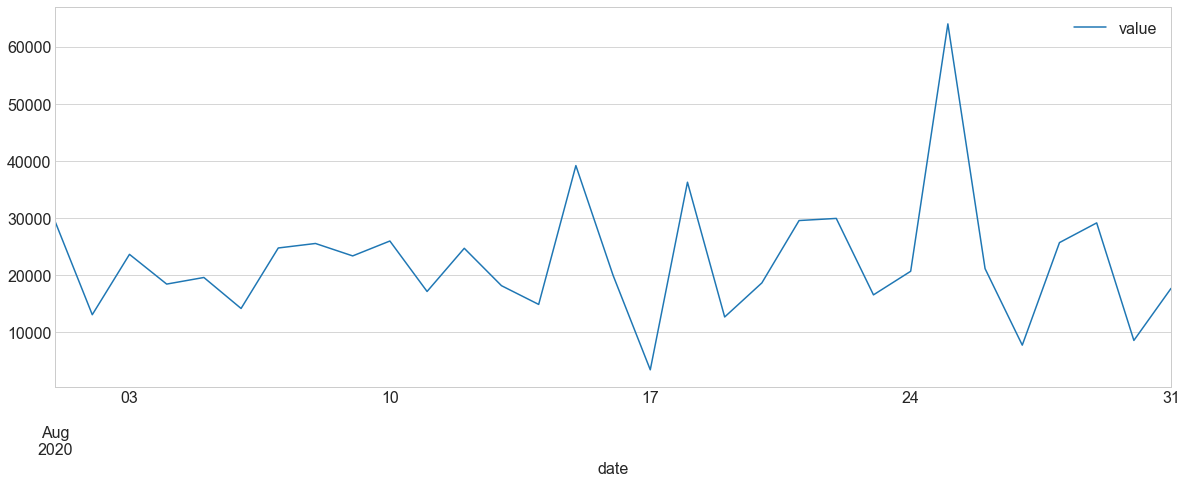

In [15]:
daily_steps.plot()

<AxesSubplot:xlabel='date'>

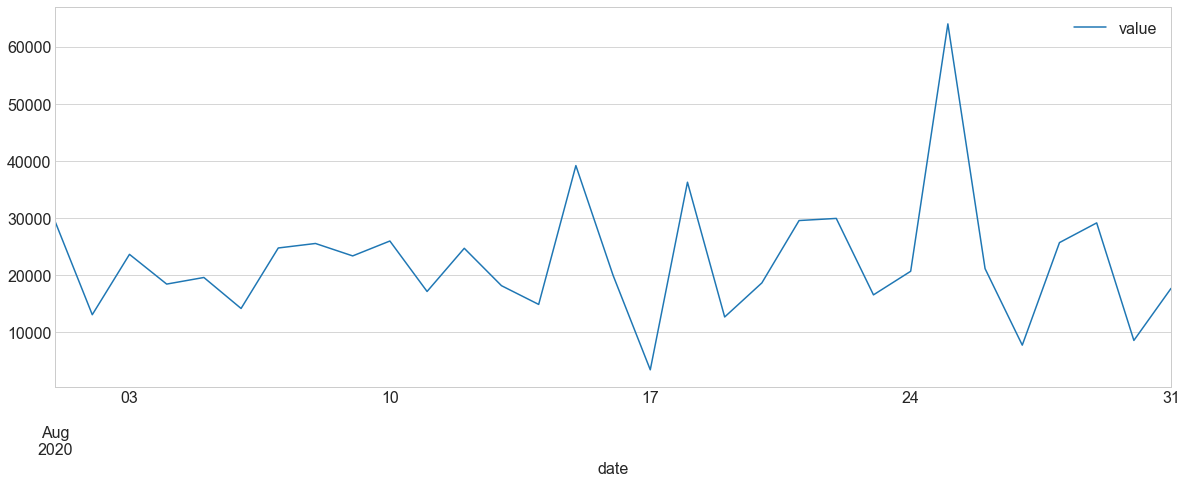

In [16]:
daily_steps['2020/08'].plot()

In [17]:
step_counts['2020-08-25':'2020-08-25']

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time,total_time
date,,,,,,,,,,
2020-08-25,StepCount,Marky Doug,13.6.1,count,9,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:39,14:39,0 days 00:00:06
2020-08-25,StepCount,Marky Doug,13.6.1,count,9,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:39,14:39,0 days 00:00:05
2020-08-25,StepCount,Marky Doug,13.6.1,count,10,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:39,14:39,0 days 00:00:05
2020-08-25,StepCount,Marky Doug,13.6.1,count,9,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:39,14:39,0 days 00:00:05
2020-08-25,StepCount,Marky Doug,13.6.1,count,9,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:39,14:39,0 days 00:00:05
...,...,...,...,...,...,...,...,...,...,...
2020-08-25,StepCount,Marky Doug,13.6.1,count,9,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:12,14:12,0 days 00:00:05
2020-08-25,StepCount,Marky Doug,13.6.1,count,51,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:11,14:11,0 days 00:00:28
2020-08-25,StepCount,Marky Doug,13.6.1,count,4,"<<HKDevice: 0x2833be120>, name:iPhone, manufac...",1,14:10,14:10,0 days 00:00:05


In [18]:
check = step_counts['2020-08-25':'2020-08-25']

In [19]:
check[check.source == '小米运动']

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time,total_time
date,,,,,,,,,,
2020-08-25,StepCount,小米运动,202008211750,count,916,NaN,1,14:40,14:49,0 days 00:09:59
2020-08-25,StepCount,小米运动,202008211750,count,911,NaN,1,14:30,14:39,0 days 00:09:59
2020-08-25,StepCount,小米运动,202008211750,count,913,NaN,1,14:20,14:29,0 days 00:09:59
2020-08-25,StepCount,小米运动,202008211750,count,389,NaN,1,14:10,14:19,0 days 00:09:59
2020-08-25,StepCount,小米运动,202008211750,count,56,NaN,1,13:50,13:59,0 days 00:09:59
2020-08-25,StepCount,小米运动,202008211750,count,62,NaN,1,12:50,12:59,0 days 00:09:59
2020-08-25,StepCount,小米运动,202008211750,count,707,NaN,1,12:40,12:49,0 days 00:09:59
2020-08-25,StepCount,小米运动,202008211750,count,871,NaN,1,12:30,12:39,0 days 00:09:59
2020-08-25,StepCount,小米运动,202008211750,count,778,NaN,1,12:20,12:29,0 days 00:09:59


In [20]:
step_counts = step_counts[step_counts.source != '小米运动']

<AxesSubplot:xlabel='date'>

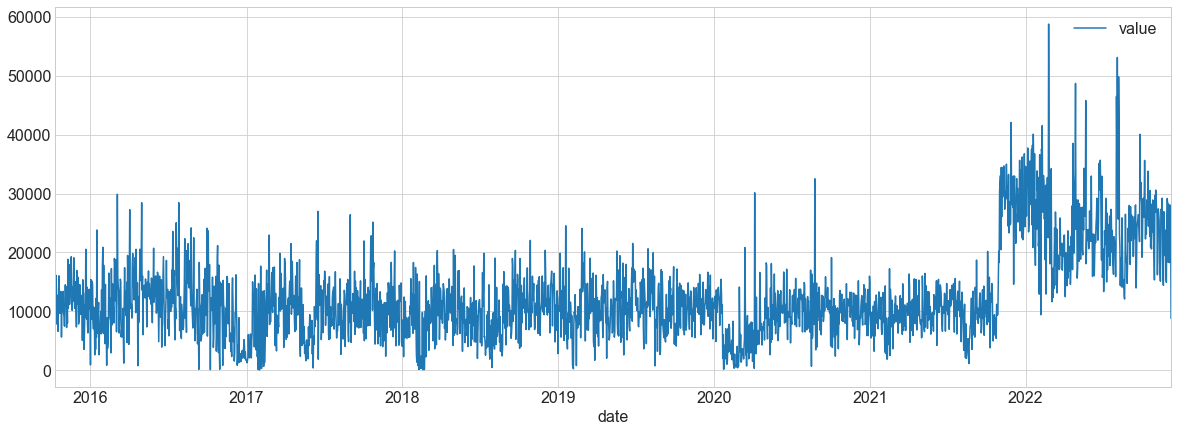

In [21]:
step_counts.resample('D')[['value']].sum().plot()

In [22]:
def get_steps(df):
    df = df[df['activity_type'] == 'StepCount']
    df.value = df.value.astype(int)
    df =df[df.source != '小米运动']
    phone_steps = df[df['source'] == 'Marky Doug']
    apple_watch_steps = df[df['source'] != 'Marky Doug']
    df = phone_steps.loc[:'2021-10-28'].append(apple_watch_steps)

    return df

In [23]:
steps_now = get_steps(records_list)

<AxesSubplot:xlabel='date'>

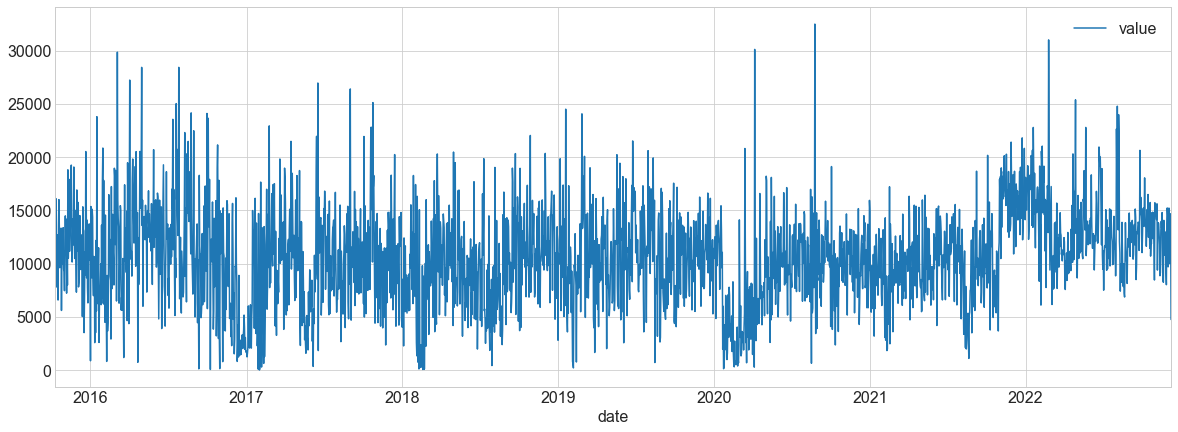

In [24]:
steps_now.resample('D')[['value']].sum().plot()

<AxesSubplot:xlabel='date'>

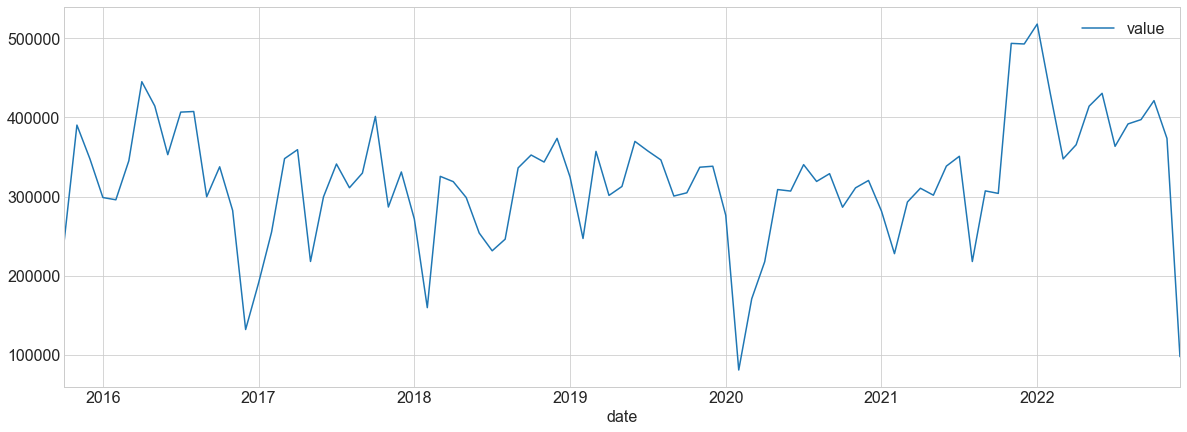

In [25]:
steps_now.resample('M')[['value']].sum().plot()

In [26]:
energy_burned = records_list[records_list['activity_type'] == 'ActiveEnergyBurned']

In [27]:
energy_burned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 529598 entries, 2020-06-18 to 2022-12-08
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   activity_type    529598 non-null  object         
 1   source           529598 non-null  object         
 2   source_ver       529598 non-null  object         
 3   unit_of_measure  529598 non-null  object         
 4   value            529598 non-null  object         
 5   device           503355 non-null  object         
 6   in_china         529598 non-null  uint8          
 7   start_time       529598 non-null  object         
 8   end_time         529598 non-null  object         
 9   total_time       529598 non-null  timedelta64[ns]
dtypes: object(8), timedelta64[ns](1), uint8(1)
memory usage: 40.9+ MB


In [28]:
energy_burned.value = energy_burned.value.astype(int)

In [29]:
energy_burned.describe()

,value,in_china,total_time
count,529598.000000,529598.000000,529598
mean,0.934637,0.242918,0 days 00:01:01.707491342
std,4.846304,0.428846,0 days 00:02:08.049409430
min,0.000000,0.000000,0 days 00:00:00
25%,0.000000,0.000000,0 days 00:00:03
50%,0.000000,0.000000,0 days 00:00:31
75%,0.000000,0.000000,0 days 00:01:01
max,133.000000,1.000000,0 days 00:28:54


In [30]:
energy_burned

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time,total_time
date,,,,,,,,,,
2020-06-18,ActiveEnergyBurned,小米运动,202006161124.0,Cal,1,NaN,1,23:10,23:19,0 days 00:09:59
2020-06-18,ActiveEnergyBurned,小米运动,202006161124.0,Cal,1,NaN,1,22:50,22:59,0 days 00:09:59
2020-06-19,ActiveEnergyBurned,小米运动,202006161124.0,Cal,1,NaN,1,22:00,22:09,0 days 00:09:59
2020-06-19,ActiveEnergyBurned,小米运动,202006161124.0,Cal,3,NaN,1,22:20,22:29,0 days 00:09:59
2020-06-19,ActiveEnergyBurned,小米运动,202006161124.0,Cal,3,NaN,1,22:30,22:39,0 days 00:09:59
...,...,...,...,...,...,...,...,...,...,...
2022-12-08,ActiveEnergyBurned,Mark的Apple Watch,9.1,Cal,0,"<<HKDevice: 0x2833bc820>, name:Apple Watch, ma...",0,07:28,07:28,0 days 00:00:03
2022-12-08,ActiveEnergyBurned,Mark的Apple Watch,9.1,Cal,0,"<<HKDevice: 0x2833bc820>, name:Apple Watch, ma...",0,07:28,07:28,0 days 00:00:03
2022-12-08,ActiveEnergyBurned,Mark的Apple Watch,9.1,Cal,0,"<<HKDevice: 0x2833bc820>, name:Apple Watch, ma...",0,07:28,07:28,0 days 00:00:02


In [31]:
energy_burned['2021-11-01':'2021-11-01'].value.sum()

2129

In [32]:
pd.options.display.max_rows = 3000

In [33]:
energy_burned['2022-08-10':'2022-08-10'].sort_values(by='start_time')

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time,total_time
date,,,,,,,,,,
2022-08-10,ActiveEnergyBurned,Mark的Apple Watch,8.7,Cal,1,"<<HKDevice: 0x2833bce10>, name:Apple Watch, ma...",0,07:21,07:22,0 days 00:01:01
2022-08-10,ActiveEnergyBurned,Mark的Apple Watch,8.7,Cal,0,"<<HKDevice: 0x2833bce10>, name:Apple Watch, ma...",0,07:22,07:23,0 days 00:00:31
2022-08-10,ActiveEnergyBurned,Mark的Apple Watch,8.7,Cal,0,"<<HKDevice: 0x2833bce10>, name:Apple Watch, ma...",0,07:23,07:24,0 days 00:01:01
2022-08-10,ActiveEnergyBurned,Mark的Apple Watch,8.7,Cal,1,"<<HKDevice: 0x2833bce10>, name:Apple Watch, ma...",0,07:24,07:25,0 days 00:00:51
2022-08-10,ActiveEnergyBurned,Mark的Apple Watch,8.7,Cal,2,"<<HKDevice: 0x2833bce10>, name:Apple Watch, ma...",0,07:25,07:26,0 days 00:01:02
2022-08-10,ActiveEnergyBurned,Mark的Apple Watch,8.7,Cal,2,"<<HKDevice: 0x2833bce10>, name:Apple Watch, ma...",0,07:26,07:27,0 days 00:00:41
2022-08-10,ActiveEnergyBurned,Mark的Apple Watch,8.7,Cal,3,"<<HKDevice: 0x2833bce10>, name:Apple Watch, ma...",0,07:27,07:28,0 days 00:01:01
2022-08-10,ActiveEnergyBurned,Mark的Apple Watch,8.7,Cal,0,"<<HKDevice: 0x2833bce10>, name:Apple Watch, ma...",0,07:28,07:29,0 days 00:01:02
2022-08-10,ActiveEnergyBurned,Mark的Apple Watch,8.7,Cal,0,"<<HKDevice: 0x2833bce10>, name:Apple Watch, ma...",0,07:29,07:29,0 days 00:00:30


<AxesSubplot:xlabel='date'>

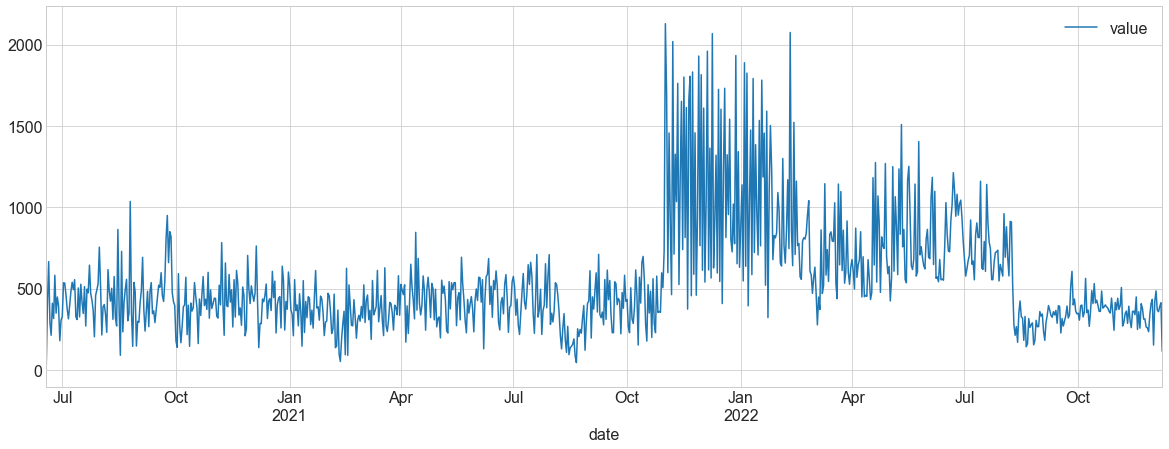

In [34]:
energy_burned.resample('D')[['value']].sum().plot()

- **2021-10-28** purchase Apple Watch. 
- **2022-02-16** last day at gym in Kunming.
- **2022-03-02** Moved back to the States.

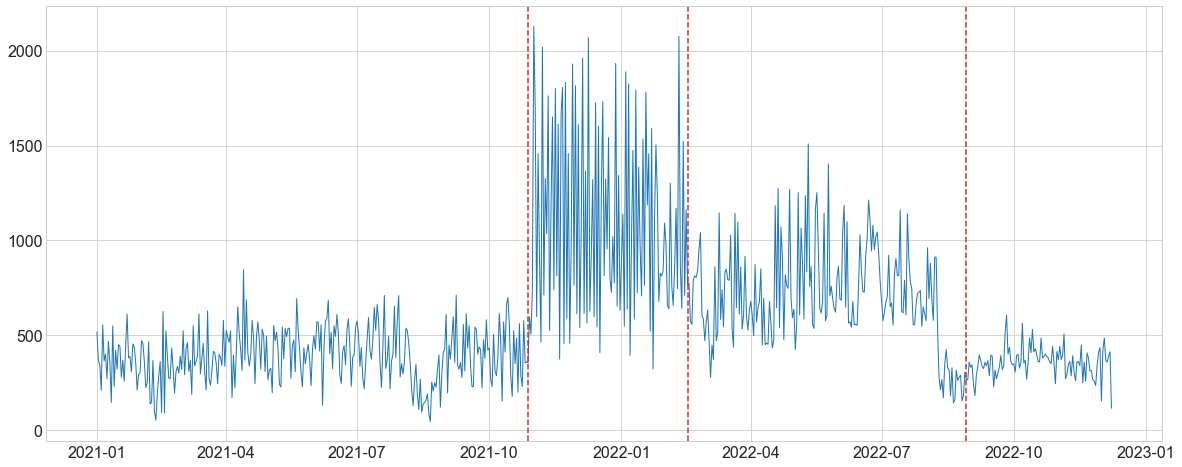

In [35]:
plt.figure(figsize = (20,8))
plt.plot(energy_burned['2021-01-01':].resample('D')[['value']].sum(), linewidth=1)
#plt.plot(energy_burned[:'2021-10-28'].resample('D')[['value']].sum(), label='Pre-Watch', linewidth=1)
plt.axvline(dt.datetime(2021,10,28), color='tab:red', linestyle= '--')
#plt.plot(energy_burned['2021-10-28':'2022-02-16'].resample('D')[['value']].sum(), label='Watch Gym', linewidth=1)
plt.axvline(dt.datetime(2022,2,16), color='tab:red', linestyle= '--')
#plt.plot(energy_burned['2022-02-17':'2022-08-29'].resample('D')[['value']].sum(), label='After Gym', linewidth=1)
#plt.plot(energy_burned['2022-08-29':].resample('D')[['value']].sum(), label='Start Codeup', linewidth=1)
plt.axvline(dt.datetime(2022,8,29), color='tab:red', linestyle= '--')

plt.show()

In [36]:
import matplotlib.dates as mdates

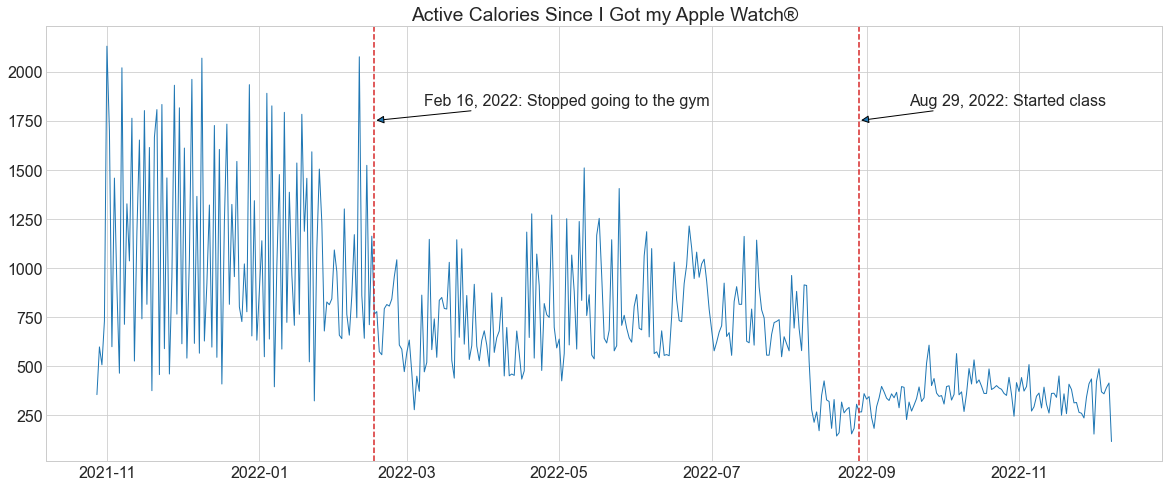

In [37]:
plt.figure(figsize = (20,8))
plt.plot(energy_burned['2021-10-28':].resample('D')[['value']].sum(), linewidth=1)
plt.axvline(dt.datetime(2022,2,16), color='tab:red', linestyle= '--')
plt.annotate('Feb 16, 2022: Stopped going to the gym',(mdates.date2num(dt.datetime(2022,2,16)), 1750), xytext=(50, 15),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
plt.axvline(dt.datetime(2022,8,29), color='tab:red', linestyle= '--')
plt.annotate('Aug 29, 2022: Started class',(mdates.date2num(dt.datetime(2022,8,29)), 1750), xytext=(50, 15),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
plt.title('Active Calories Since I Got my Apple Watch®')

plt.show()

In [38]:
energy_burned.source.value_counts()

Mark的Apple Watch    503355
小米运动                 26243
Name: source, dtype: int64

In [39]:
xiaomi_energy = energy_burned[energy_burned.source=='小米运动']

<AxesSubplot:xlabel='date'>

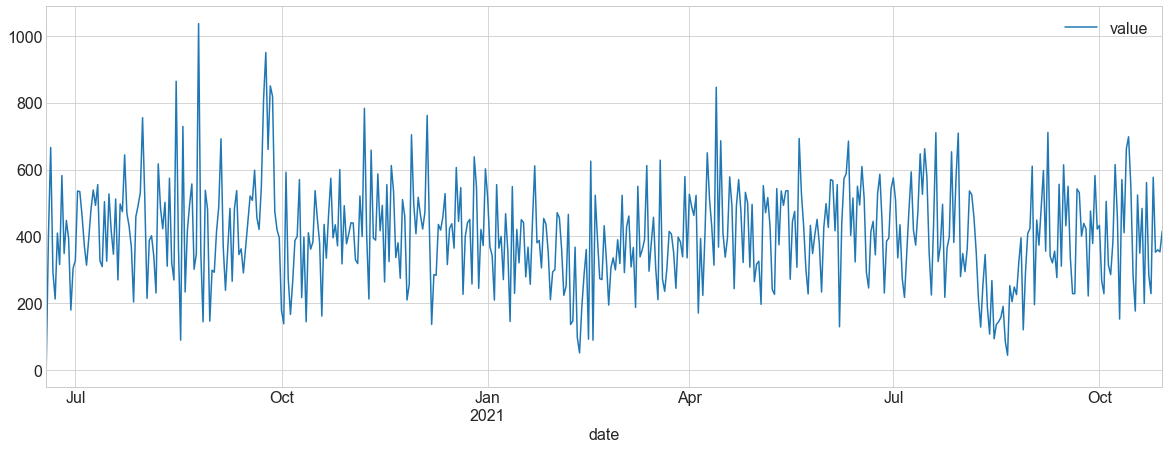

In [40]:
xiaomi_energy.resample('D')[['value']].sum().plot()

In [41]:
xiaomi_records = records_list[records_list.source == '小米运动']

In [42]:
xiaomi_records.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58015 entries, 2020-04-18 to 2021-12-01
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   activity_type    58015 non-null  object         
 1   source           58015 non-null  object         
 2   source_ver       58015 non-null  object         
 3   unit_of_measure  55540 non-null  object         
 4   value            58015 non-null  object         
 5   device           0 non-null      object         
 6   in_china         58015 non-null  uint8          
 7   start_time       58015 non-null  object         
 8   end_time         58015 non-null  object         
 9   total_time       58015 non-null  timedelta64[ns]
dtypes: object(8), timedelta64[ns](1), uint8(1)
memory usage: 4.5+ MB


In [43]:
xiaomi_records.activity_type.value_counts()

StepCount             29271
ActiveEnergyBurned    26243
SleepAnalysis          2475
HeartRate                24
BodyMassIndex             1
BodyMass                  1
Name: activity_type, dtype: int64

In [44]:
records_list.source.value_counts()

Mark的Apple Watch    1373492
Marky Doug           822733
小米运动                  58015
Lose It!              10921
香山健康                    696
Renpho Health           600
Renpho                  574
健康                      249
时钟                      168
FatSecret               124
血氧                       11
Mark的iPhone               7
Name: source, dtype: int64

In [45]:
records_list[records_list.source=='Lose It!']

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time,total_time
date,,,,,,,,,,
2022-09-06,DietaryCholesterol,Lose It!,1,mg,137.5,NaN,0,11:42,11:42,0 days
2022-09-06,DietaryProtein,Lose It!,1,g,27.5,NaN,0,11:42,11:42,0 days
2022-09-06,DietaryCarbohydrates,Lose It!,1,g,5.0,NaN,0,11:42,11:42,0 days
2022-09-06,DietaryFiber,Lose It!,1,g,0.0,NaN,0,11:42,11:42,0 days
2022-09-06,DietarySodium,Lose It!,1,mg,70.0,NaN,0,11:42,11:42,0 days
...,...,...,...,...,...,...,...,...,...,...
2022-12-08,DietaryCarbohydrates,Lose It!,0,g,17.0,NaN,0,09:00,09:00,0 days
2022-12-08,DietaryEnergyConsumed,Lose It!,0,Cal,190.0,NaN,0,09:00,09:00,0 days
2022-12-08,DietaryCarbohydrates,Lose It!,0,g,5.26308,NaN,0,09:00,09:00,0 days


In [46]:
sleep_info = records_list[records_list.activity_type=='SleepAnalysis']

In [47]:
sleep_info.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5070 entries, 2016-10-10 to 2022-12-08
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   activity_type    5070 non-null   object         
 1   source           5070 non-null   object         
 2   source_ver       5031 non-null   object         
 3   unit_of_measure  0 non-null      object         
 4   value            5070 non-null   object         
 5   device           168 non-null    object         
 6   in_china         5070 non-null   uint8          
 7   start_time       5070 non-null   object         
 8   end_time         5070 non-null   object         
 9   total_time       5070 non-null   timedelta64[ns]
dtypes: object(8), timedelta64[ns](1), uint8(1)
memory usage: 401.0+ KB


In [48]:
sleep_info

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time,total_time
date,,,,,,,,,,
2016-10-10,SleepAnalysis,时钟,50,NaN,HKCategoryValueSleepAnalysisInBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,21:45,06:30,0 days 08:45:50
2016-10-11,SleepAnalysis,时钟,50,NaN,HKCategoryValueSleepAnalysisInBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,22:30,03:18,0 days 04:48:56
2016-10-12,SleepAnalysis,时钟,50,NaN,HKCategoryValueSleepAnalysisInBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,22:37,07:00,0 days 08:22:59
2016-10-12,SleepAnalysis,时钟,50,NaN,HKCategoryValueSleepAnalysisInBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,06:32,06:41,0 days 00:08:36
2016-10-12,SleepAnalysis,时钟,50,NaN,HKCategoryValueSleepAnalysisInBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,04:01,04:09,0 days 00:08:36
...,...,...,...,...,...,...,...,...,...,...
2022-12-08,SleepAnalysis,Mark的Apple Watch,9.1,NaN,HKCategoryValueSleepAnalysisAsleepCore,NaN,0,00:12,01:42,0 days 01:29:30
2022-12-08,SleepAnalysis,Mark的Apple Watch,9.1,NaN,HKCategoryValueSleepAnalysisAsleepCore,NaN,0,04:26,05:58,0 days 01:32:00
2022-12-08,SleepAnalysis,Mark的Apple Watch,9.1,NaN,HKCategoryValueSleepAnalysisAsleepREM,NaN,0,01:42,02:10,0 days 00:28:00


In [49]:
sleep_info['value'] = sleep_info['value'].str.replace('HKCategoryValueSleepAnalysis', '')

In [50]:
sleep_info

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time,total_time
date,,,,,,,,,,
2016-10-10,SleepAnalysis,时钟,50,NaN,InBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,21:45,06:30,0 days 08:45:50
2016-10-11,SleepAnalysis,时钟,50,NaN,InBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,22:30,03:18,0 days 04:48:56
2016-10-12,SleepAnalysis,时钟,50,NaN,InBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,22:37,07:00,0 days 08:22:59
2016-10-12,SleepAnalysis,时钟,50,NaN,InBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,06:32,06:41,0 days 00:08:36
2016-10-12,SleepAnalysis,时钟,50,NaN,InBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,04:01,04:09,0 days 00:08:36
...,...,...,...,...,...,...,...,...,...,...
2022-12-08,SleepAnalysis,Mark的Apple Watch,9.1,NaN,AsleepCore,NaN,0,00:12,01:42,0 days 01:29:30
2022-12-08,SleepAnalysis,Mark的Apple Watch,9.1,NaN,AsleepCore,NaN,0,04:26,05:58,0 days 01:32:00
2022-12-08,SleepAnalysis,Mark的Apple Watch,9.1,NaN,AsleepREM,NaN,0,01:42,02:10,0 days 00:28:00


In [51]:
sleep_info.value.value_counts()

AsleepUnspecified    2431
InBed                1081
AsleepCore            740
AsleepREM             353
Awake                 245
AsleepDeep            220
Name: value, dtype: int64

In [52]:
sleep_info.source.value_counts()

小米运动                2475
Mark的Apple Watch    1694
Marky Doug           733
时钟                   168
Name: source, dtype: int64

In [53]:
sleep_info.groupby('value').total_time.sum()

value
AsleepCore           12 days 11:38:00
AsleepDeep            2 days 13:35:00
AsleepREM             5 days 13:37:30
AsleepUnspecified    55 days 12:54:33
Awake                 0 days 10:46:42
InBed               242 days 22:51:52
Name: total_time, dtype: timedelta64[ns]

In [54]:
pd.DataFrame(sleep_info.groupby(['date','value']).total_time.sum())

,,total_time
date,value,
2016-10-10,InBed,0 days 08:45:50
2016-10-11,InBed,0 days 04:48:56
2016-10-12,InBed,0 days 11:17:19
2016-10-13,InBed,0 days 08:12:36
2016-10-14,InBed,0 days 00:05:22
2016-10-16,InBed,0 days 08:05:31
2016-10-17,InBed,0 days 08:14:56
2016-10-18,InBed,0 days 07:35:38
2016-10-19,InBed,0 days 08:14:33


In [55]:
inbed_time = sleep_info[sleep_info.value == 'InBed']

In [175]:
from matplotlib.dates import DateFormatter, date2num, HourLocator
import matplotlib.ticker

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(inbed_time['start_time'], df['val'])    

def timeTicks(x, pos):
    seconds = x / 10**9
    d = datetime.timedelta(seconds=seconds)
    return str(d)

formatter = matplotlib.ticker.FuncFormatter(timeTicks)
ax.xaxis.set_major_formatter(formatter)

<BarContainer object of 25 artists>

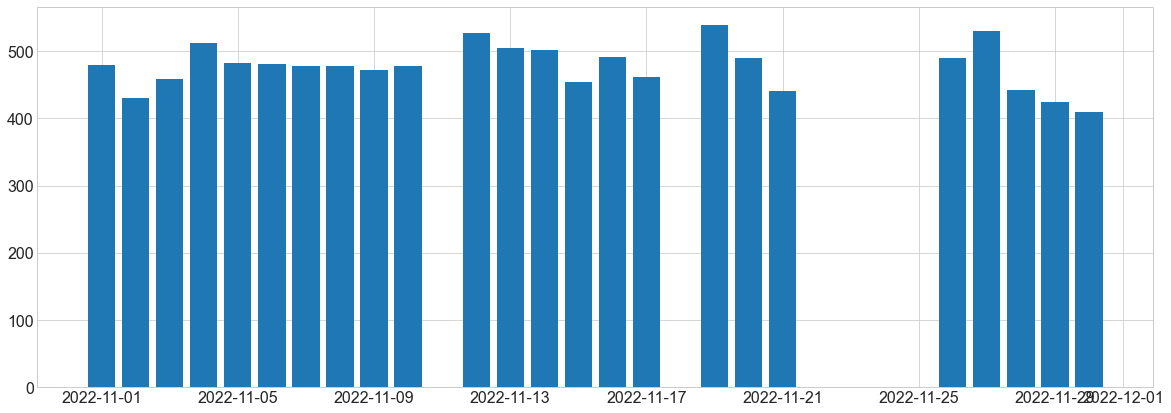

In [69]:
plt.bar(inbed_time['2022-11'].index, inbed_time['2022-11'].total_time.dt.total_seconds()/60)

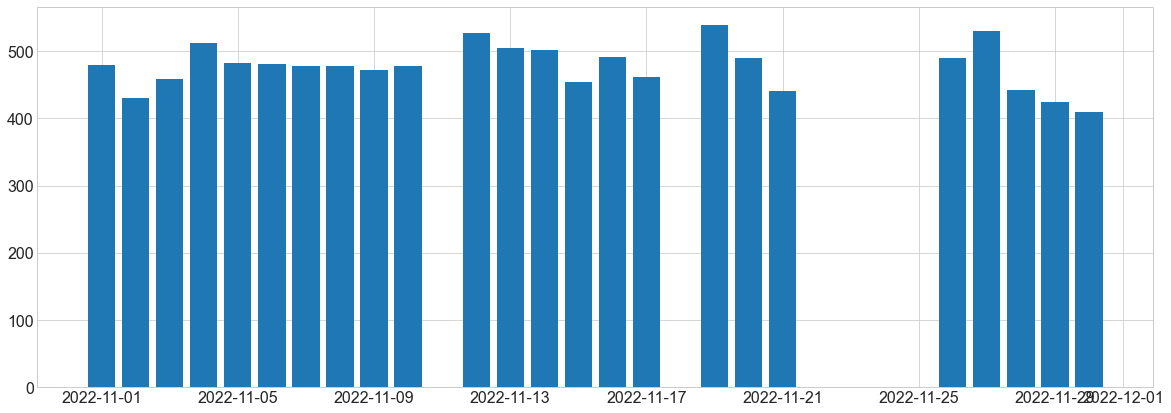

In [75]:

if (year > 2010) & (month > 0) & (month <=12):
    df = inbed_time[f'{year}-{month}']
    plt.bar(df.index, df.total_time.dt.total_seconds()/60)
else:
    plt.bar(df.index, df.total_time.dt.total_seconds()/60)

In [71]:
plt.bar(inbed_time[''].index, inbed_time[''].total_time.dt.total_seconds()/60)

KeyError: ''

In [63]:
inbed_time['min'] = inbed_time.total_time*60000000000

In [64]:
inbed_time

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time,total_time,min
date,,,,,,,,,,,
2016-10-10,SleepAnalysis,时钟,50,NaN,InBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,21:45,06:30,0 days 08:45:50,-56445 days +01:05:25.813166080
2016-10-11,SleepAnalysis,时钟,50,NaN,InBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,22:30,03:18,0 days 04:48:56,39836 days 23:42:19.513028608
2016-10-12,SleepAnalysis,时钟,50,NaN,InBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,22:37,07:00,0 days 08:22:59,87982 days 22:11:10.413373440
2016-10-12,SleepAnalysis,时钟,50,NaN,InBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,06:32,06:41,0 days 00:08:36,73650 days 23:25:15.372388352
2016-10-12,SleepAnalysis,时钟,50,NaN,InBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,04:01,04:09,0 days 00:08:36,73650 days 23:25:15.372388352
2016-10-12,SleepAnalysis,时钟,50,NaN,InBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,04:18,06:30,0 days 02:11:44,-84993 days +01:10:01.137504256
2016-10-12,SleepAnalysis,时钟,50,NaN,InBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,03:55,03:57,0 days 00:01:44,57876 days 04:38:06.171553792
2016-10-12,SleepAnalysis,时钟,50,NaN,InBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,03:49,03:55,0 days 00:05:52,-17616 days +16:06:42.563399680
2016-10-12,SleepAnalysis,时钟,50,NaN,InBed,"<<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...",1,03:34,03:46,0 days 00:11:40,-37457 days +08:02:43.350970368
